In [1]:
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import copy
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.5

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

# UPDATE 2020-12-31 (my preferred font is Avenir...)
font = {'family' : 'avenir',
        'weight' : 'normal'}

matplotlib.rc('font', **font)

from afrc import AnalyticalFRC
from afrc.polymer_models import nudep_saw, saw, wlc2
import protfasta
import metapredict as meta
from sparrow import Protein
from sparrow.data import amino_acids



In [2]:
chain_lengths = np.arange(1,1000)

Re_pA = []
Re_pG = []

Rg_pA = []
Rg_pG = []


for i in chain_lengths:
    pA = AnalyticalFRC('A'*i)
    pG = AnalyticalFRC('G'*i)
    
    Re_pA.append(pA.get_mean_end_to_end_distance())
    Rg_pA.append(pA.get_mean_radius_of_gyration())

    Re_pG.append(pG.get_mean_end_to_end_distance())
    Rg_pG.append(pG.get_mean_radius_of_gyration())



meta NOT subset; don't know how to subset; dropped


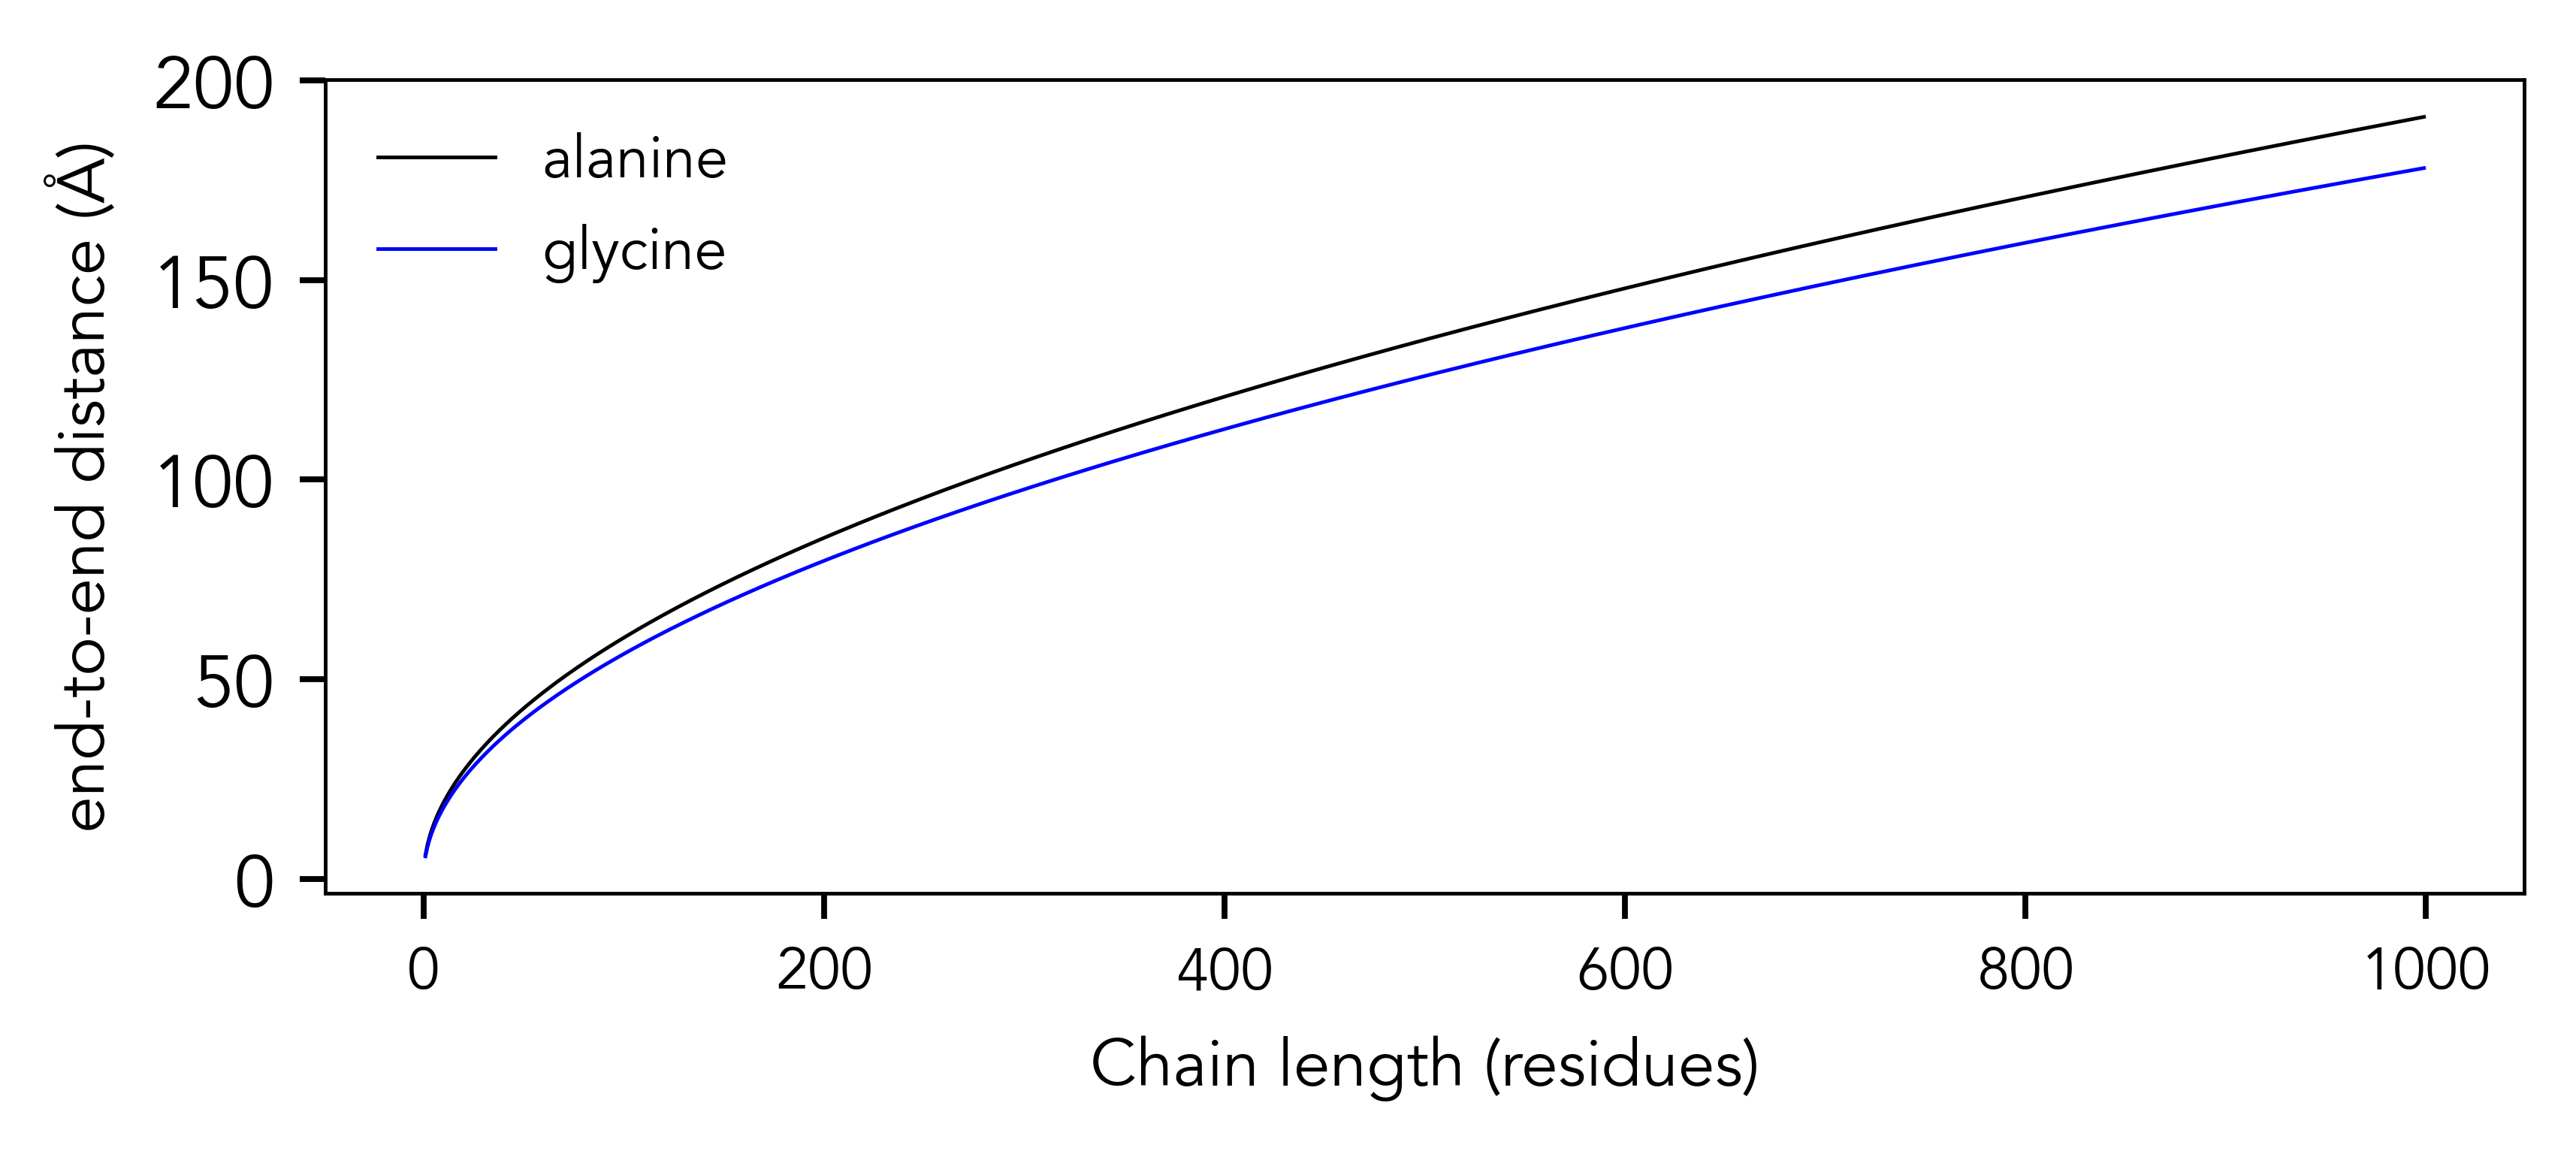

In [19]:
figure(None, (5.,2.3), dpi=350)
plt.plot(chain_lengths, Re_pA, linewidth=0.5, color='k', label='alanine')
plt.plot(chain_lengths, Re_pG, linewidth=0.5, color='b', label='glycine')

plt.xticks(fontsize=8)
plt.legend(fontsize=8, frameon=False)

plt.ylabel('end-to-end distance (Å)', fontsize=9)
plt.xlabel('Chain length (residues)', fontsize=9)


plt.tight_layout()
plt.savefig('re_comparison.pdf')


meta NOT subset; don't know how to subset; dropped


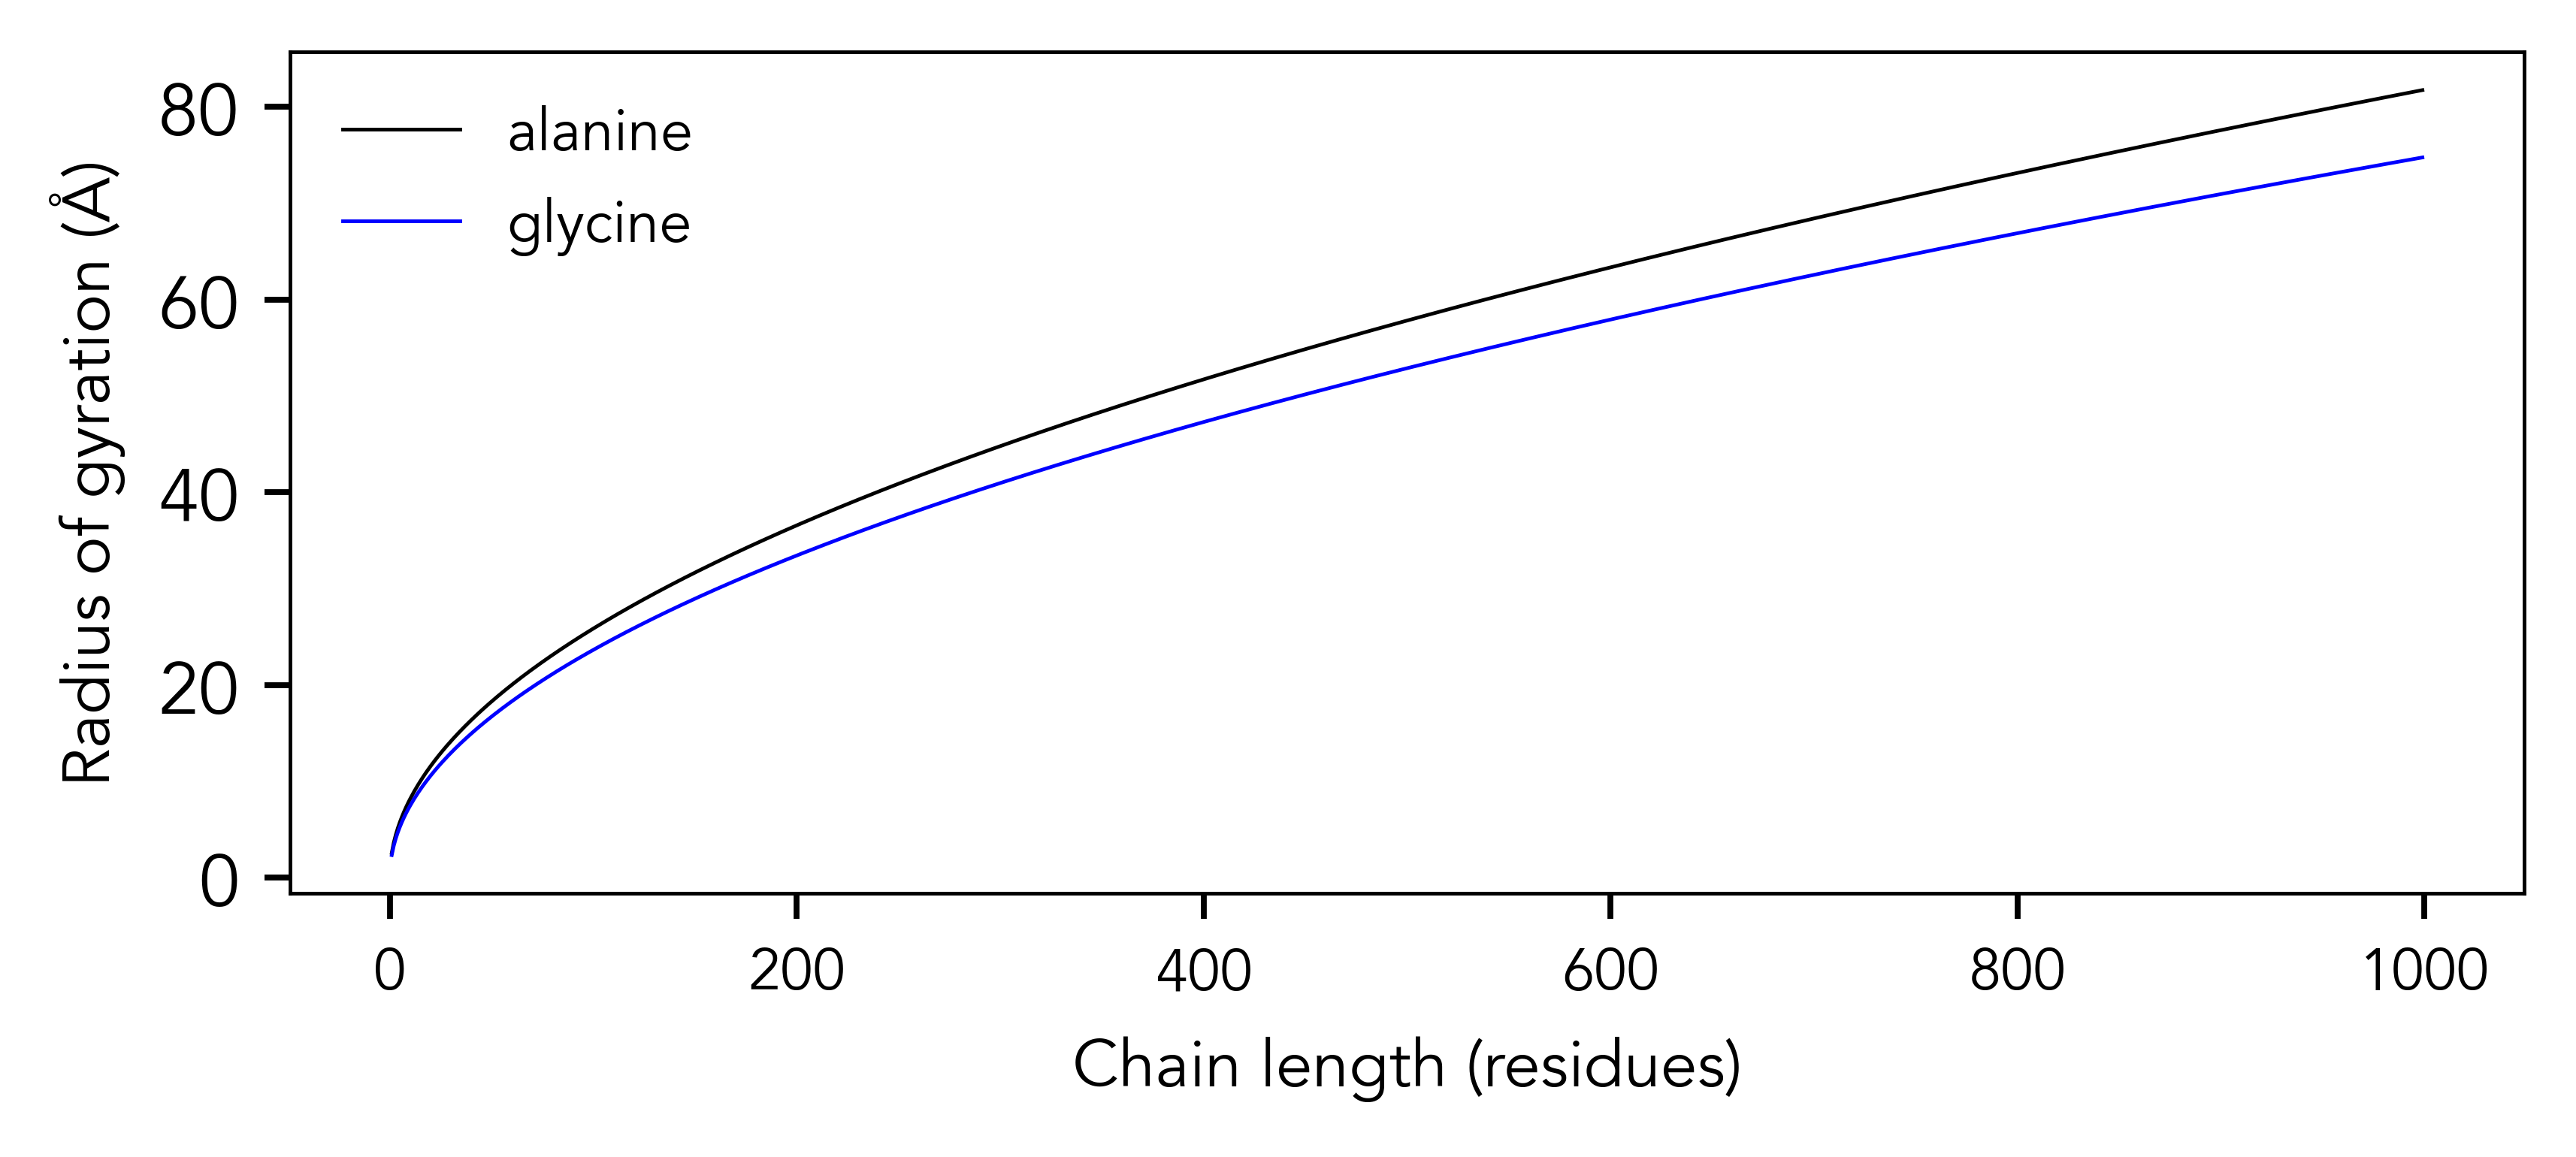

In [20]:
figure(None, (5.,2.3), dpi=350)
plt.plot(chain_lengths, Rg_pA, linewidth=0.5, color='k', label='alanine')
plt.plot(chain_lengths, Rg_pG, linewidth=0.5, color='b', label='glycine')

plt.xticks(fontsize=8)
plt.legend(fontsize=8, frameon=False)

plt.ylabel('Radius of gyration (Å)', fontsize=9)
plt.xlabel('Chain length (residues)', fontsize=9)

plt.tight_layout()
plt.savefig('rg_comparison.pdf')
